<a href="https://colab.research.google.com/github/ellenwang995/week2_pandas/blob/main/PythonFinalAssignment_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Data:**

[Data sourced from EIA:](https://www.eia.gov/electricity/data.php)
the data includes monthly electricity prices (in cents/kWh) and sales (in MWh) by state  from 2010 to 2025.


In [ ]:
#importing data
import pandas as pd

price_df = pd.read_excel("/content/MonthlyPrice_State.xlsx")
price_df.head()


,Year,Month,Date,State,Price,Sales,Revenue,∆Price,∆Sales,E
0,2025,7,Jul 2025,Alaska,27.30,148350.34,40502.62,NaN,NaN,NaN
1,2025,7,Jul 2025,Alabama,15.88,3708754.80,589018.84,-0.060788,-0.033685,1.804621
2,2025,7,Jul 2025,Arkansas,13.23,2100595.40,277912.37,-0.064360,-0.022134,2.907701
3,2025,7,Jul 2025,Arizona,15.38,5247371.70,806999.60,-0.035690,0.094834,-0.376346
4,2025,7,Jul 2025,California,32.58,8266152.60,2693302.60,0.000920,0.174224,0.005280


**Exploring and Cleaning the Data:**

In [ ]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Year     9537 non-null   int64         
 1   Month    9537 non-null   int64         
 2   Date     9537 non-null   object        
 3   State    9537 non-null   object        
 4   Price    9537 non-null   float64       
 5   Sales    9537 non-null   float64       
 6   Revenue  9537 non-null   float64       
 7   ∆Price   573 non-null    float64       
 8   ∆Sales   573 non-null    float64       
 9   E        573 non-null    float64       
 10  Date_dt  9537 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(2), object(2)
memory usage: 819.7+ KB


In [ ]:
#change the variable "Date" to a date and time variable type
price_df['Date_dt'] = pd.to_datetime(price_df['Date'], format = '%b %Y')
price_df['Date_dt']

,Date_dt
0,2025-07-01
1,2025-07-01
2,2025-07-01
3,2025-07-01
4,2025-07-01
...,...
9532,2010-01-01
9533,2010-01-01
9534,2010-01-01
9535,2010-01-01


I used the [python documentation book](https://docs.python.org/3/library/datetime.html#format-codes) to look up how to format the last argument to fit the format of the variable "Date" in my dataset. I found that %b represents an abbreviated month format.

In [ ]:
#checking for duplicates
price_df[price_df.duplicated(keep=False)].sort_values(by=['Date_dt', 'State'])
price_df[price_df.duplicated(keep = False)]

,Year,Month,Date,State,Price,Sales,Revenue,∆Price,∆Sales,E,Date_dt


**Mutating the Exisitng Data Frame:**

In addition to looking into change in electricity prices and price volatility on a macro time scale, it is also important to assess volatility throughout the year. This is why we also create a separate data frame isolated for electricity prices during the year 2021 and 2024.


In [ ]:
#creating a new data frame price_2021 with all the entries from price_df that have the year 2021
price_2021 = price_df[price_df['Date_dt'].dt.year == 2021]
price_2021

,Year,Month,Date,State,Price,Sales,Revenue,∆Price,∆Sales,E,Date_dt
2193,2021,12,Dec 2021,Alaska,22.14,224382.19,49686.60,NaN,NaN,NaN,2021-12-01
2194,2021,12,Dec 2021,Alabama,9.66,2385839.00,230572.49,0.146643,0.191157,0.767134,2021-12-01
2195,2021,12,Dec 2021,Arkansas,10.99,1390341.60,152800.64,NaN,NaN,NaN,2021-12-01
2196,2021,12,Dec 2021,Arizona,12.62,2361337.70,297917.72,NaN,NaN,NaN,2021-12-01
2197,2021,12,Dec 2021,California,23.38,7382767.40,1725994.60,-0.144956,0.143886,-1.007436,2021-12-01
...,...,...,...,...,...,...,...,...,...,...,...
2800,2021,1,Jan 2021,Vermont,18.39,222603.83,40938.80,NaN,NaN,NaN,2021-01-01
2801,2021,1,Jan 2021,Washington,9.77,3986354.80,389375.66,NaN,NaN,NaN,2021-01-01
2802,2021,1,Jan 2021,Wisconsin,14.03,2154212.70,302198.40,NaN,NaN,NaN,2021-01-01
2803,2021,1,Jan 2021,West Virginia,11.19,1346359.70,150707.71,NaN,NaN,NaN,2021-01-01


In [ ]:
#creating another new data frame price_2024 with all the entries from price_df that have the year 2024
price_2024 = price_df[price_df['Date_dt'].dt.year == 2024]
price_2024

,Year,Month,Date,State,Price,Sales,Revenue,∆Price,∆Sales,E,Date_dt
357,2024,12,Dec 2024,Alaska,22.38,211868.21,47425.22,NaN,NaN,NaN,2024-12-01
358,2024,12,Dec 2024,Alabama,14.91,2788677.20,415668.94,-0.052966,-0.047584,1.113109,2024-12-01
359,2024,12,Dec 2024,Arkansas,11.74,1499647.50,176081.29,NaN,NaN,NaN,2024-12-01
360,2024,12,Dec 2024,Arizona,15.20,2353304.30,357730.26,NaN,NaN,NaN,2024-12-01
361,2024,12,Dec 2024,California,30.55,7074452.60,2161521.30,-0.049107,-0.080667,0.608762,2024-12-01
...,...,...,...,...,...,...,...,...,...,...,...
964,2024,1,Jan 2024,Vermont,21.14,230484.45,48712.78,NaN,NaN,NaN,2024-01-01
965,2024,1,Jan 2024,Washington,11.07,4694306.70,519574.15,NaN,NaN,NaN,2024-01-01
966,2024,1,Jan 2024,Wisconsin,16.54,2189903.50,362248.76,NaN,NaN,NaN,2024-01-01
967,2024,1,Jan 2024,West Virginia,13.65,1301973.60,177732.18,NaN,NaN,NaN,2024-01-01


**Data Visualizations:**

Here, we create line graphs for change in electricity prices across the whole time from of 2010 - 2024 (pricefig1)

We also create line graphs for change in electricity prices for 2021 and 2024.

In [ ]:
# !pip -q install plotly
import plotly.express as px

In [ ]:
def price_fig(df, state, title):

#I used AI to help me create the following line of code allowing for variation in state selection
    if state == 'all':
        filtered_df = df
    else:
        filtered_df = df[df['State'].isin(state)]


    pricefig1 = px.line(filtered_df, x='Date_dt', y='Price', color='State',
                       title=title,
                       labels={'Date_dt': 'Date', 'Price': 'Price (cents/kWh)'})

    return pricefig1

#Select the states you are interested. For the purpose of intial inqury, we will take three of the largest economic states in the US: California, Texas, and New York

state = ["California", "Texas"]

#Figure 1 shows the change in electricity prices from 2010-2024 for California, Texas, and New York.
pricefig1 = price_fig(price_df, state, 'Change in Retail Electricity Price (2010-2024)')
pricefig1.show()

#Figure 2 shows the change in electricity prices during 2024 for California, Texas, and New York.
pricefig2 = price_fig(price_2024, state, 'Change in Retail Electricity Price (2024)')
pricefig2.show()

#Figure 3 shows the change in electricity prices during 2021 for California, Texas, and New York.
pricefig3 = price_fig(price_2021, state, 'Change in Retail Electricity Price (2021)')
pricefig3.show()


AI input for creating the function so the graphs could change by selecting different states:

I have a code that produces a line graph using a function allowing for variation in dataframe, state, and title input. How can I create a statement that allows for the change in state or have multiple states?

def price_fig(df, state, title): pricefig = px.line(df, x='Date_dt', y='Price', color='State', title=title, labels={'Date_dt': 'Date', 'Price': 'Price (cents/kWh)'}) return pricefig

AI Output:

AI gave me the command:

    if state == 'all':
        filtered_df = df
    else:
        filtered_df = df[df['State'].isin(state)]

and changed the dataframe input in the px.line function to the created variable filtered_df

**Figure Analysis:**

There are a few clear take aways from the three figures above. From all the figures, it is clear that retail electricity prices in California are much higher than in Texas or NY. ALso, there are clear dips in California retail price every August and Ocotober from 2014 - 2020. Overall retail electricity prices in California are higher and more volatile than in Texas. But, how come?

In [ ]:
#Let's create another data frame for the year 2016 to further explore the relationship between sales and price
price_2016 = price_df[price_df['Date_dt'].dt.year == 2016]
price_2016

#The figures blow plot the fluctuations in retail sales of electricity in California
def sales_fig(df, state, title):

    if state == 'all':
        filtered_df = df
    else:
        filtered_df = df[df['State'].isin(state)]


    salesfig = px.line(filtered_df, x='Date_dt', y='Sales', color='State',
                       title=title,
                       labels={'Date_dt': 'Date', 'Sales': 'Sales (MWh)'})

    return salesfig

state = ["Texas", "California"]


salesfig1 = sales_fig(price_df, state, 'Change in Electricity Sales (2010-2024)')
salesfig1.show()

salesfig2 = sales_fig(price_2016, state, 'Change in Electricity Sales (2016)')
salesfig2.show()


In [ ]:
def saleprice_fig(df, state, title):

    if state == 'all':
        filtered_df = df
    else:
        filtered_df = df[df['State'].isin(state)]


    saleprice_fig = px.line(filtered_df, x='Date_dt', y='Sales', color='State',
                       title=title,
                       labels={'Date_dt': 'Date', 'Sales': 'Sales (MWh)'})

    return saleprice_fig

state = ["California"]


salespricefig1 = saleprice_fig(price_df, state, 'Change in Electricity Sales and Price (2010-2024)')
salespricefig1.show()

salespricefig2 = saleprice_fig(price_2016, state, 'Change in Electricity Sales and Price (2016)')
salespricefig2.show()

**Wholesale Market Analysis**

Demand in both California and Texas markets fluctuate with weather, thus the price volatility in the California market can not be fully explained by changes in demand.

To dig deeper, we need to look at wholesale electricity market prices. This will determine if the price volatility in the California market is a result of the price of the phyisical electricity (depenedent on supply composition) or a result of revenue regulation and market structure in California.

**Importing New Data:**

Data sourced from [Energy Markets and Policy at Berkeley Lab](https://emp.lbl.gov/renewables-and-wholesale-electricity-prices-rewep)

Data includes wholesale market prices for each ISO from 2012-2014 as well as rewnewable load and total net load. I have sperated them into two excel sheets for ease

In [ ]:
#importing new data
ISOprice_df = pd.read_excel("/content/ISOprice.xlsx")
ISOprice_df.head()

load_df = pd.read_excel("/content/RE_load.xlsx")
load_df.head()

,iso,year,season,hour,re_gw,net_load_gw
0,All ISOs,2012,All year,0,14.2,221.1
1,All ISOs,2012,All year,1,14.0,210.9
2,All ISOs,2012,All year,2,13.7,205.0
3,All ISOs,2012,All year,3,13.4,202.6
4,All ISOs,2012,All year,4,13.1,205.4


**Exploring and Cleaning the New Data:**

In [ ]:
#gain an overview on the type of data in data frame
ISOprice_df.info()
load_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11376 entries, 0 to 11375
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   iso             11376 non-null  object 
 1   year            11376 non-null  int64  
 2   season          11376 non-null  object 
 3   hour            11376 non-null  int64  
 4   real_price_mwh  11376 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 444.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12480 entries, 0 to 12479
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   iso          12480 non-null  object 
 1   year         12480 non-null  int64  
 2   season       12480 non-null  object 
 3   hour         12480 non-null  int64  
 4   re_gw        12480 non-null  float64
 5   net_load_gw  12480 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 585.1+ KB


In [ ]:
#understand the variables within the dataframe and the categories of the categorical variables

print(ISOprice_df['iso'].value_counts())
print(ISOprice_df['season'].value_counts())

print(load_df['iso'].value_counts())
print(load_df['season'].value_counts())

iso
CAISO       1560
ISO-NE      1560
NYISO       1560
MISO        1560
PJM         1560
ERCOT       1296
SPP         1200
All ISOs    1080
Name: count, dtype: int64
season
Fall (Oct-Dec)      2280
Winter (Jan-Mar)    2280
Spring (Apr-Jun)    2280
Summer (Jul-Sep)    2280
All year            2256
Name: count, dtype: int64
iso
All ISOs    1560
CAISO       1560
ERCOT       1560
ISO-NE      1560
MISO        1560
NYISO       1560
PJM         1560
SPP         1560
Name: count, dtype: int64
season
All year            2496
Fall (Oct-Dec)      2496
Spring (Apr-Jun)    2496
Summer (Jul-Sep)    2496
Winter (Jan-Mar)    2496
Name: count, dtype: int64


I used the [pandas documentation book](https://pandas.pydata.org/docs/user_guide/categorical.html#categoricaldtype) to find which function I can use to list how many values are assigned to each category. I found that I could use the function .value_counts to show all the categories in the categorical variables I was interested in and the number of values in each category.

In [ ]:
#we see that for the wholesale price data, ERCOT (Texas) has less data than for CAISO (California).
#thus, we should standardize the data to only include years where both ERCOT and CAISO have data

isoyears = ISOprice_df.groupby('iso')['year'].unique()
print(isoyears)

iso
All ISOs    [2015, 2016, 2017, 2018, 2019, 2020, 2021, 202...
CAISO       [2012, 2013, 2014, 2015, 2016, 2017, 2018, 201...
ERCOT       [2014, 2015, 2016, 2017, 2018, 2019, 2020, 202...
ISO-NE      [2012, 2013, 2014, 2015, 2016, 2017, 2018, 201...
MISO        [2012, 2013, 2014, 2015, 2016, 2017, 2018, 201...
NYISO       [2012, 2013, 2014, 2015, 2016, 2017, 2018, 201...
PJM         [2012, 2013, 2014, 2015, 2016, 2017, 2018, 201...
SPP         [2015, 2016, 2017, 2018, 2019, 2020, 2021, 202...
Name: year, dtype: object


In [ ]:
#remove data from before 2015 for all ISOs

ISOprice_df = ISOprice_df[ISOprice_df['year'] >= 2015]
load_df = load_df[load_df['year'] >= 2015]

print(ISOprice_df['iso'].value_counts())
print(ISOprice_df['season'].value_counts())

print(load_df['iso'].value_counts())
print(load_df['season'].value_counts())

iso
CAISO       1200
ERCOT       1200
ISO-NE      1200
MISO        1200
PJM         1200
NYISO       1200
SPP         1200
All ISOs    1080
Name: count, dtype: int64
season
Winter (Jan-Mar)    1920
Fall (Oct-Dec)      1896
Spring (Apr-Jun)    1896
Summer (Jul-Sep)    1896
All year            1872
Name: count, dtype: int64
iso
All ISOs    1200
CAISO       1200
ERCOT       1200
ISO-NE      1200
MISO        1200
NYISO       1200
PJM         1200
SPP         1200
Name: count, dtype: int64
season
All year            1920
Fall (Oct-Dec)      1920
Spring (Apr-Jun)    1920
Summer (Jul-Sep)    1920
Winter (Jan-Mar)    1920
Name: count, dtype: int64


In [ ]:
#checking for duplicates
print(f"Number of duplicate rows for ISO Data: {ISOprice_df.duplicated().sum()}")
print(f"Number of duplicate rows for Load Data: {load_df.duplicated().sum()}")

Number of duplicate rows for ISO Data: 0
Number of duplicate rows for Load Data: 0


**Creating a New Data Frame:**

Analyze seasonal variation compared to hourly

In [ ]:
#creating new df for wholesale price
season_avg = ISOprice_df.groupby(['iso', 'season', 'year'])['real_price_mwh'].mean().reset_index()
season_avg.columns = ['ISO', 'Season', 'Year', 'Avg_Price']

season_avg.head(300)

,ISO,Season,Year,Avg_Price
0,All ISOs,All year,2016,32.975000
1,All ISOs,All year,2017,35.116667
2,All ISOs,All year,2018,41.320833
3,All ISOs,All year,2020,25.708333
4,All ISOs,All year,2021,66.841667
...,...,...,...,...
295,PJM,All year,2015,41.583333
296,PJM,All year,2016,34.191667
297,PJM,All year,2017,35.933333
298,PJM,All year,2018,42.604167


In [ ]:
#reodering chronologically

season_order = ['Winter (Jan-Mar)', 'Spring (Apr-Jun)', 'Summer (Jul-Sep)', 'Fall (Oct-Dec)']

season_avg['Season'] = pd.Categorical(season_avg['Season'],
                                      categories=season_order,
                                      ordered=True)

season_avg = season_avg.sort_values(by=['ISO', 'Year', 'Season']).reset_index(drop=True)

season_avg = season_avg.dropna(subset=['Season'])
#because we did not define "all year", it will be given a NaN value. We want these values to be taken out if we are conducting a time series analysis

season_avg.head(100)


,ISO,Season,Year,Avg_Price
0,All ISOs,Winter (Jan-Mar),2015,50.495833
1,All ISOs,Fall (Oct-Dec),2015,29.445833
2,All ISOs,Winter (Jan-Mar),2016,28.012500
3,All ISOs,Spring (Apr-Jun),2016,29.341667
4,All ISOs,Summer (Jul-Sep),2016,37.950000
...,...,...,...,...
117,ERCOT,Summer (Jul-Sep),2019,85.441667
118,ERCOT,Fall (Oct-Dec),2019,32.937500
120,ERCOT,Winter (Jan-Mar),2020,27.383333
121,ERCOT,Spring (Apr-Jun),2020,20.250000


AI Input:


In [ ]:
#before we can create a line graph, we need to consolidate a variable for date
season_avg['Time'] = season_avg['Season'].astype(str) + ' ' + season_avg['Year'].astype(str)

season_avg.head(100)

,ISO,Season,Year,Avg_Price,Time
0,All ISOs,Winter (Jan-Mar),2015,50.495833,Winter (Jan-Mar) 2015
1,All ISOs,Fall (Oct-Dec),2015,29.445833,Fall (Oct-Dec) 2015
2,All ISOs,Winter (Jan-Mar),2016,28.012500,Winter (Jan-Mar) 2016
3,All ISOs,Spring (Apr-Jun),2016,29.341667,Spring (Apr-Jun) 2016
4,All ISOs,Summer (Jul-Sep),2016,37.950000,Summer (Jul-Sep) 2016
...,...,...,...,...,...
117,ERCOT,Summer (Jul-Sep),2019,85.441667,Summer (Jul-Sep) 2019
118,ERCOT,Fall (Oct-Dec),2019,32.937500,Fall (Oct-Dec) 2019
120,ERCOT,Winter (Jan-Mar),2020,27.383333,Winter (Jan-Mar) 2020
121,ERCOT,Spring (Apr-Jun),2020,20.250000,Spring (Apr-Jun) 2020


Problem Shot with AI:

.astype(str)

In [ ]:
#we also want to create a dataframe including only the years before the energy crisis in 2021 and after 2020 when retail prices start diverging more between California and Texas
isoprice_2020 = season_avg[season_avg['Year'] <= 2020]
isoprice_2020

,ISO,Season,Year,Avg_Price,Time
0,All ISOs,Winter (Jan-Mar),2015,50.495833,Winter (Jan-Mar) 2015
1,All ISOs,Fall (Oct-Dec),2015,29.445833,Fall (Oct-Dec) 2015
2,All ISOs,Winter (Jan-Mar),2016,28.012500,Winter (Jan-Mar) 2016
3,All ISOs,Spring (Apr-Jun),2016,29.341667,Spring (Apr-Jun) 2016
4,All ISOs,Summer (Jul-Sep),2016,37.950000,Summer (Jul-Sep) 2016
...,...,...,...,...,...
368,SPP,Fall (Oct-Dec),2019,22.608333,Fall (Oct-Dec) 2019
370,SPP,Winter (Jan-Mar),2020,19.066667,Winter (Jan-Mar) 2020
371,SPP,Spring (Apr-Jun),2020,16.033333,Spring (Apr-Jun) 2020
372,SPP,Summer (Jul-Sep),2020,24.300000,Summer (Jul-Sep) 2020


In [ ]:
isoprice_2022 = season_avg[season_avg['Year'] > 2021]
isoprice_2022

,ISO,Season,Year,Avg_Price,Time
30,All ISOs,Winter (Jan-Mar),2022,51.262500,Winter (Jan-Mar) 2022
31,All ISOs,Spring (Apr-Jun),2022,69.912500,Spring (Apr-Jun) 2022
32,All ISOs,Summer (Jul-Sep),2022,90.287500,Summer (Jul-Sep) 2022
33,All ISOs,Fall (Oct-Dec),2022,76.262500,Fall (Oct-Dec) 2022
35,All ISOs,Winter (Jan-Mar),2023,34.358333,Winter (Jan-Mar) 2023
...,...,...,...,...,...
388,SPP,Fall (Oct-Dec),2023,24.083333,Fall (Oct-Dec) 2023
390,SPP,Winter (Jan-Mar),2024,24.733333,Winter (Jan-Mar) 2024
391,SPP,Spring (Apr-Jun),2024,19.166667,Spring (Apr-Jun) 2024
392,SPP,Summer (Jul-Sep),2024,25.420833,Summer (Jul-Sep) 2024


In [ ]:
#now we want to do the same thing with Energy Source
reseason_avg = load_df.groupby(['iso', 'season', 'year'])[['re_gw','net_load_gw']].sum().reset_index()
reseason_avg.columns = ['ISO', 'Season', 'Year', 'Re_GW', 'Non_GW']

reseason_avg.head(300)

,ISO,Season,Year,Re_GW,Non_GW
0,All ISOs,All year,2015,455.50,6592.5
1,All ISOs,All year,2016,560.50,6519.8
2,All ISOs,All year,2017,669.40,6342.5
3,All ISOs,All year,2018,728.00,6551.5
4,All ISOs,All year,2019,808.00,6353.4
...,...,...,...,...,...
295,NYISO,Winter (Jan-Mar),2020,14.29,390.6
296,NYISO,Winter (Jan-Mar),2021,13.20,401.2
297,NYISO,Winter (Jan-Mar),2022,16.76,406.4
298,NYISO,Winter (Jan-Mar),2023,14.75,386.8


In [ ]:
#next, we want to create a new column that shows the proportion of RE(solar and wind)load compared to non-solar and wind
reseason_avg['pct_re'] = 100 * reseason_avg['Re_GW'] / (reseason_avg['Re_GW'] + reseason_avg['Non_GW'])
reseason_avg.head()

,ISO,Season,Year,Re_GW,Non_GW,pct_re
0,All ISOs,All year,2015,455.5,6592.5,6.462826
1,All ISOs,All year,2016,560.5,6519.8,7.916331
2,All ISOs,All year,2017,669.4,6342.5,9.546628
3,All ISOs,All year,2018,728.0,6551.5,10.000687
4,All ISOs,All year,2019,808.0,6353.4,11.282710


In [ ]:
#and again we want to reorder chronologically
season_order = ['Winter (Jan-Mar)', 'Spring (Apr-Jun)', 'Summer (Jul-Sep)', 'Fall (Oct-Dec)']

reseason_avg['Season'] = pd.Categorical(reseason_avg['Season'],
                                      categories=season_order,
                                      ordered=True)

reseason_avg = reseason_avg.sort_values(by=['ISO', 'Year', 'Season']).reset_index(drop=True)

reseason_avg = reseason_avg.dropna(subset=['Season'])

reseason_avg.head(100)

,ISO,Season,Year,Re_GW,Non_GW,pct_re
0,All ISOs,Winter (Jan-Mar),2015,427.2,6801.1,5.910103
1,All ISOs,Spring (Apr-Jun),2015,471.5,6217.4,7.048992
2,All ISOs,Summer (Jul-Sep),2015,393.0,7457.9,5.005796
3,All ISOs,Fall (Oct-Dec),2015,530.0,5895.7,8.248129
5,All ISOs,Winter (Jan-Mar),2016,570.5,6233.1,8.385267
...,...,...,...,...,...,...
118,ERCOT,Fall (Oct-Dec),2018,191.3,732.4,20.710187
120,ERCOT,Winter (Jan-Mar),2019,215.5,715.4,23.149640
121,ERCOT,Spring (Apr-Jun),2019,233.9,799.3,22.638405
122,ERCOT,Summer (Jul-Sep),2019,212.6,1074.9,16.512621


In [ ]:
#and combine year and season
reseason_avg['Time'] = reseason_avg['Season'].astype(str) + ' ' + reseason_avg['Year'].astype(str)

reseason_avg.head(100)

,ISO,Season,Year,Re_GW,Non_GW,pct_re,Time
0,All ISOs,Winter (Jan-Mar),2015,427.2,6801.1,5.910103,Winter (Jan-Mar) 2015
1,All ISOs,Spring (Apr-Jun),2015,471.5,6217.4,7.048992,Spring (Apr-Jun) 2015
2,All ISOs,Summer (Jul-Sep),2015,393.0,7457.9,5.005796,Summer (Jul-Sep) 2015
3,All ISOs,Fall (Oct-Dec),2015,530.0,5895.7,8.248129,Fall (Oct-Dec) 2015
5,All ISOs,Winter (Jan-Mar),2016,570.5,6233.1,8.385267,Winter (Jan-Mar) 2016
...,...,...,...,...,...,...,...
118,ERCOT,Fall (Oct-Dec),2018,191.3,732.4,20.710187,Fall (Oct-Dec) 2018
120,ERCOT,Winter (Jan-Mar),2019,215.5,715.4,23.149640,Winter (Jan-Mar) 2019
121,ERCOT,Spring (Apr-Jun),2019,233.9,799.3,22.638405,Spring (Apr-Jun) 2019
122,ERCOT,Summer (Jul-Sep),2019,212.6,1074.9,16.512621,Summer (Jul-Sep) 2019


**Creating Visualizations:**

In [ ]:
#Figure 1: Wholesale Price (2015-2024)
def isoprice_fig(iso):

    if isinstance(iso, str):
        iso = [iso]

    iso_df = season_avg[season_avg['ISO'].isin(iso)]

    isoprice_fig = px.line(iso_df, x = 'Time', y = 'Avg_Price', color='ISO',
                         title = "Wholesale Market Prices (all years)",
                         labels={'Time':'Date', 'Avg_Price':'Price ($/MWh)'})

    return isoprice_fig

iso_fig1 = isoprice_fig(['ERCOT', 'CAISO', 'NYISO'])
iso_fig1.show()

In [ ]:
#Wholesale prices (2015-2020)
def isoprice_fig2(iso):

    if isinstance(iso, str):
        iso = [iso]

    iso_df2 = isoprice_2020[isoprice_2020['ISO'].isin(iso)]

    isoprice_fig2 = px.line(iso_df2, x = 'Time', y = 'Avg_Price', color='ISO',
                         title = "Wholesale Market Prices (2015-2020)",
                         labels={'Time':'Date', 'Avg_Price':'Price ($/MWh)'})

    return isoprice_fig2

iso_fig2 = isoprice_fig2(['ERCOT', 'CAISO', 'NYISO'])
iso_fig2.show()

In [ ]:
#Wholesale Prices (2022-2024)
def isoprice_fig3(iso):

    if isinstance(iso, str):
        iso = [iso]

    iso_df3 = isoprice_2022[isoprice_2022['ISO'].isin(iso)]

    isoprice_fig3 = px.line(iso_df3, x = 'Time', y = 'Avg_Price', color='ISO',
                         title = "Wholesale Market Prices (2022-2024)",
                         labels={'Time':'Date', 'Avg_Price':'Price ($/MWh)'})

    return isoprice_fig3

iso_fig3 = isoprice_fig3(['ERCOT', 'CAISO', 'NYISO'])
iso_fig3.show()

In [ ]:
#RE Percetage of Total Load
def re_fig(iso):

    if isinstance(iso, str):
        iso = [iso]

    re_df = reseason_avg[reseason_avg['ISO'].isin(iso)]

    re_fig = px.line(re_df, x = 'Time', y = 'pct_re', color='ISO',
                         title = 'Percent Renewable Energy Load (all years)',
                         labels={'Time':'Date', 'pct_re':'% of Total Load (GW)'})

    return re_fig

re_fig1 = re_fig(['ERCOT', 'CAISO', 'NYISO'])
re_fig1.show()

**Text Analysis:**

As demonstrated by the data anylsis above, the high electricity prices in California are likely not arrtibuted to the actual prices of wholesale electricity given the similarity between wholesale prices in ERCOT and CAISO. Furthermore, while some of the retial price volatility is correlated with suppply volatility and wholesale price volatility, these dynamics again are present in the ERCOT market. The next step is to analyze market regulations in CAISO and ERCOT, which is likely the cause of the retail price differential between the two markets.

Based on the GE Verona Article, it is clear that California and Texas's varying retail electricity market structures have a significant impact on retail prices. Because Texas has a highly competitive, unregulated retail market and California has a more regulated market, we will assess the General Rate Cases proposed to the CPUC where utility companies must provide reasioning for their proposed revenue for the coming years. Looking at the change in frequency of key words can illuminate the shift in reasoning behind retail pricing strucutres.

Text Source: [CPUC General Rate Case](https://www.cpuc.ca.gov/industries-and-topics/electrical-energy/electric-rates/general-rate-case/pacific-gas-and-electric-grc-proceedings)

Because these cases come in the form of PDFs, we will also need to extract the text from the PDFs.

AI Prompt for Extracting Text from PDF:

How can I extract text from a PDF to use for text analysis?


In [ ]:
#import and download NLTK package
!pip -q install -U nltk
import nltk
needed = ["punkt_tab",           # tokenizer (splits text into words)
          "stopwords",       # list of common words to remove (the, and, is, ...)
          "wordnet",         # lexical database used for lemmatization (getting word roots)
          "averaged_perceptron_tagger_eng"]  # part-of-speech tagger (N/V/Adj/Adv)
for pkg in needed:
    nltk.download(pkg, quiet=True) # no status text printed - just download

print("NLTK version:", nltk.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 36.2 MB/s eta 0:00:00
NLTK version: 3.9.2


In [ ]:
#download PDF extract package
!pip install PyPDF2

import PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 2.6 MB/s eta 0:00:00


In [ ]:
#extract text from the 2023-2026 GRC
def extract_text_from_pdf(pdf_path):
    text = ""

    with open(pdf_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)

        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            text += page.extract_text()

    return text

PGE_2023 = extract_text_from_pdf('/content/PGE_GRC_2023.pdf')
print(PGE_2023[:500])

 
520896345  - 1 - COM/JR5/nd 3 Date of Issuance 11/17/2023  
 
 
Decision 23-11-069  November 16, 2023 
 
 
BEFORE THE PUBLIC UTILITIES COMMISSION OF THE STATE OF CALIFORNIA 
 
Application  of Pacific  Gas and Electric  
Company  for Authority,  Among  
Other  Things, to Increase  Rates  and 
Charges  for Electric and Gas Service  
Effective  on January  1, 2023. (U39M)  
 Application 21-06-021 
 
 
DECISION ON TEST YEAR 2023 GENERAL RATE CASE FOR 
PACIFIC GAS AND ELECTRIC COMPANY  
 A.21-06-02


In [ ]:
#extract text from the 2020-2022 GRC
def extract_text_from_pdf(pdf_path):
    text = ""

    with open(pdf_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)

        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            text += page.extract_text()

    return text

PGE_2020 = extract_text_from_pdf('/content/PGE_GRC_2020.pdf')
print(PGE_2020[:500])

354486687 - 1 -ALJ/RL8/EC2/gp2   Date  of Issuance:   12/11/2020  
 
Decision  20-12-005   December  3, 2020  
 
BEFORE  THE PUBLIC  UTILITIES  COMMISSION  OF THE STATE  OF CALIFORNIA  
 
Application  of Pacific  Gas and Electric  
Company  for Authority,  Among  
Other  Things,  to Increase  Rates  and 
Charges  for Electric  and Gas Service  
Effective  on January  1, 2020.  (U39M)  
 Application  18- 12-009  
 
 
DECISION  ADDRESSING  THE TEST  YEAR  2020  GENERAL  RATE  CASE  OF 
PACIFIC  GA


In [ ]:
#extract text from the 2017-2019 GRC
def extract_text_from_pdf(pdf_path):
    text = ""

    with open(pdf_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)

        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            text += page.extract_text()

    return text

PGE_2017 = extract_text_from_pdf('/content/PGE_GRC_2017.pdf')
print(PGE_2017[:500])

186836115  - 1 - COM/MP6/lil  Date of Issuan ce 5/18/2017   
  
Decision 17-05-013  May 11, 2017
 
 
BEFORE THE PUBLIC UTILITIES COMMISSION OF THE STATE OF CALIFORNIA 
 
Application of Pacific Gas and Electric 
Company for Authority, Among Other 
Things, to Increase Rates and Charges for Electric and Gas Service Effective on January 1, 2017 (U39M). 
  
 
Application 15-09-001 
(Filed September 1, 2015) 
  
 
DECISION AUTHORIZING PACIFIC GAS AND ELECTRIC COMPANY’S 
GENERAL RATE CASE REVENUE REQUI


**Tolkenize and Explore:**

Now that our text has been converted from PDF form, we can standardize the text and explore

In [ ]:
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, FreqDist
from nltk.tokenize import RegexpTokenizer

In [ ]:
#tolkenize text, make them lowercase, and keep alphabetic tokens only
from nltk.tokenize import word_tokenize

tokens_2023 = [w.lower() for w in word_tokenize(PGE_2023) if w.isalpha()]
print(len(tokens_2023), tokens_2023[:10])
tokens_2020 = [w.lower() for w in word_tokenize(PGE_2020) if w.isalpha()]
print(len(tokens_2020), tokens_2020[:10])
tokens_2017 = [w.lower() for w in word_tokenize(PGE_2017) if w.isalpha()]
print(len(tokens_2017), tokens_2017[:10])

230459 ['date', 'of', 'issuance', 'decision', 'november', 'before', 'the', 'public', 'utilities', 'commission']
99375 ['date', 'of', 'issuance', 'decision', 'december', 'before', 'the', 'public', 'utilities', 'commission']
63733 ['date', 'of', 'issuan', 'ce', 'decision', 'may', 'before', 'the', 'public', 'utilities']


In [ ]:
#removing stopwords
def remove_stopwords(toks):
    stops = set(stopwords.words("english"))
    return [t for t in toks if t not in stops]

tokens_2023 = remove_stopwords(tokens_2023)
tokens_2020 = remove_stopwords(tokens_2020)
tokens_2017 = remove_stopwords(tokens_2017)

In [ ]:
#lemmatization
def wordnet_pos(tag):
    return {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}.get(tag[0], wordnet.NOUN)

def pos_lemmatize(toks):
    tags = pos_tag(toks)
    lem = WordNetLemmatizer()
    return [lem.lemmatize(t, wordnet_pos(tag)) for t, tag in tags]

clean_2023 = pos_lemmatize(tokens_2023)
print(clean_2023[:20])

clean_2020 = pos_lemmatize(tokens_2020)
print(clean_2020[:20])

clean_2017 = pos_lemmatize(tokens_2017)
print(clean_2017[:20])

['date', 'issuance', 'decision', 'november', 'public', 'utility', 'commission', 'state', 'california', 'application', 'pacific', 'gas', 'electric', 'company', 'authority', 'among', 'thing', 'increase', 'rate', 'charge']
['date', 'issuance', 'decision', 'december', 'public', 'utility', 'commission', 'state', 'california', 'application', 'pacific', 'gas', 'electric', 'company', 'authority', 'among', 'thing', 'increase', 'rate', 'charge']
['date', 'issuan', 'ce', 'decision', 'may', 'public', 'utility', 'commission', 'state', 'california', 'application', 'pacific', 'gas', 'electric', 'company', 'authority', 'among', 'thing', 'increase', 'rate']


**Text Analysis (Dispersion Charts):**

In [ ]:
fdist = FreqDist(clean_2017)
print("\nTop 10 most common words:\n")

for word, count in fdist.most_common(50):
    print(f"{word:>10}   {count}")


Top 10 most common words:

         e   1595
        pg   1570
settlement   472
commission   415
   section   354
 agreement   344
   million   336
     party   313
      cost   276
      year   270
       tax   268
       grc   265
   revenue   257
   provide   243
       gas   241
      rate   234
requirement   233
  electric   228
   exhibit   223
   account   203
  decision   195
 testimony   194
     adopt   194
   service   186
    settle   184
  customer   180
    safety   178
   propose   175
   utility   173
      rule   170
  forecast   167
   program   166
   expense   165
distribution   160
     issue   152
 reduction   145
        th   144
     shall   143
      also   137
  increase   133
      turn   133
    report   133
      work   131
   proceed   127
   project   126
   include   125
     state   120
   request   118
    record   117
    change   117


Text(0.5, 1.0, 'Word Dispersion – GRC 2017')

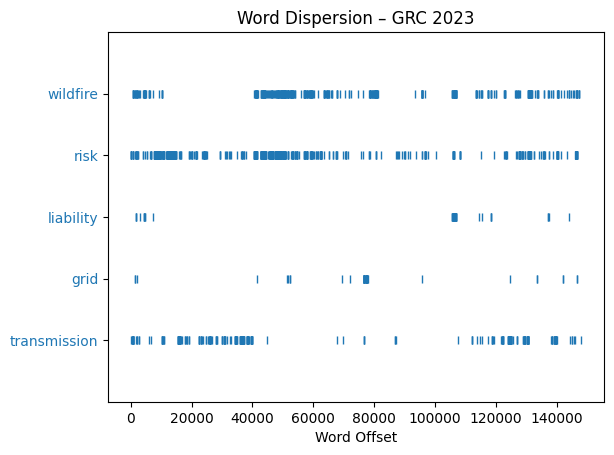

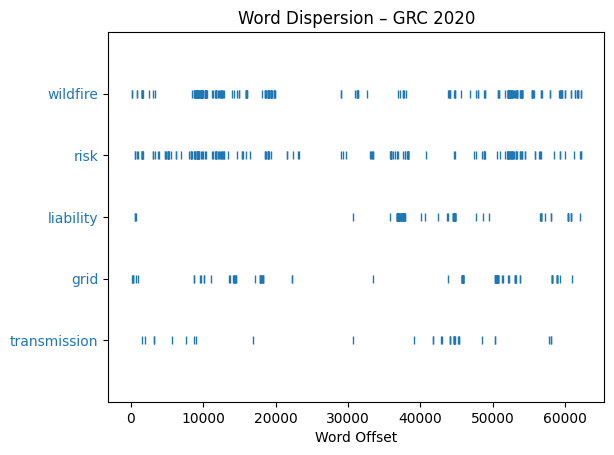

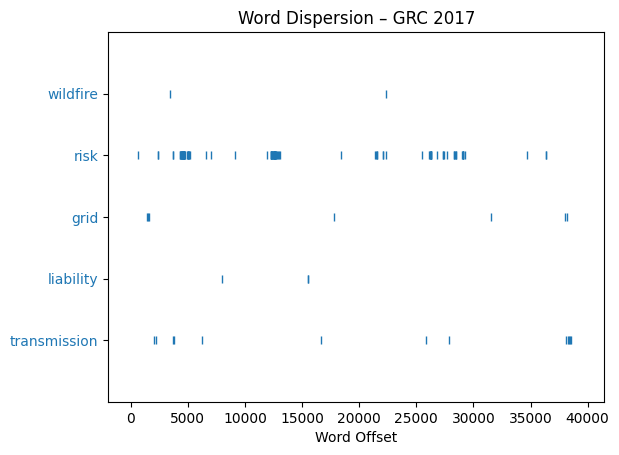

In [ ]:
import matplotlib.pyplot as plt
from nltk.text import Text
GRC_23 = Text(clean_2023)
GRC_23.dispersion_plot(["wildfire", 'risk', 'liability', "grid", "transmission"])
plt.title("Word Dispersion – GRC 2023")

GRC_20 = Text(clean_2020)
GRC_20.dispersion_plot(["wildfire", 'risk', 'liability', "grid","transmission"])
plt.title("Word Dispersion – GRC 2020")

GRC_17 = Text(clean_2017)
GRC_17.dispersion_plot(["wildfire", 'risk', "grid", 'liability', "transmission"])
plt.title("Word Dispersion – GRC 2017")

AI Input for creating titles:

can I add titles to these figures: from nltk.text import Text GRC_23 = Text(clean_2023) GRC_23.dispersion_plot(["wildfire", 'liability', "grid"]) GRC_20 = Text(clean_2020) GRC_20.dispersion_plot(["wildfire", 'liability', "grid"]) GRC_17 = Text(clean_2017) GRC_17.dispersion_plot(["wildfire", 'liability', "grid"])